In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ▶ MLP structure
- input layer node: 2개
- 1st hidden layer node: 5개
- 2nd hidden layer node: 3개
- output layer node: 2개
- activation function: sigmoid

# 1. 함수 정의

In [16]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [17]:
def d_sigmoid(a):
    return sigmoid(a) * (1 - sigmoid(a))

In [18]:
def mse(y,t):
    return 0.5 * np.mean((y-t)**2)

# 2. X와 t

In [19]:
X = np.array([[0,1],
              [1,0],
              [1,1],
              [-1,0],
              [0,-1],
              [-1,-1]])

t = np.array([[1,0],
              [1,0],
              [0,1],
              [0,1],
              [1,0],
              [0,1]])
print(X.shape, t.shape)

(6, 2) (6, 2)


In [20]:
# sample의 수
num_data = X.shape[0]
# num_data = t.shape[0]

# input layer node의 수 (특징의 수)
input_node = X.shape[1]

# 1st hidden layer node의 수
hid_node1 = 5

# 2nd hidden layer node의 수
hid_node2 = 3

# output layer node의 수 (class의 수)
output_node = t.shape[1]

# 3. W와 b의 초기값

In [21]:
# output layer → 2nd hidden layer
W3 = np.random.randn(output_node,hid_node2)
b3 = np.random.randn(output_node)

# 2nd hidden layer → 1st hidden layer
W2 = np.random.randn(hid_node2,hid_node1)
b2 = np.random.randn(hid_node2)

# 1st hidden layer → input layer
W1 = np.random.randn(hid_node1,input_node)
b1 = np.random.randn(hid_node1)

## ※ shape 확인

In [22]:
print(t.shape)
print(W3.shape)
print(b3.shape)
print(W2.shape)
print(b2.shape)
print(W1.shape)
print(b1.shape)
print(X.shape)

(6, 2)
(2, 3)
(2,)
(3, 5)
(3,)
(5, 2)
(5,)
(6, 2)


# 4. predict

In [23]:
def predict(x_in,w1,b1,w2,b2,w3,b3):
    a1 = x_in.dot(w1.T) + b1
    z1 = sigmoid(a1)    
    a2 = z1.dot(w2.T) + b2
    z2 = sigmoid(a2)
    a3 = z2.dot(w3.T) + b3
    y = sigmoid(a3)
    return a1,z1,a2,z2,a3,y

# 5. Backpropagation

In [24]:
learning_rate = 0.1
iter = 50000
cost = np.zeros((iter))

In [25]:
for i in range(iter):
    a1,z1,a2,z2,a3,y = predict(X,W1,b1,W2,b2,W3,b3)
    cost[i] = mse(y,t)
    
    del_out = (y-t) * d_sigmoid(a3) 
    del_hid2 = del_out.dot(W3) * d_sigmoid(a2)
    del_hid1 = del_hid2.dot(W2) * d_sigmoid(a1)
        
    W3 = W3 - learning_rate * del_out.T.dot(z2) / num_data
    b3 = b3 - learning_rate * np.sum(del_out,axis=0) / num_data
    
    W2 = W2 - learning_rate * del_hid2.T.dot(z1) / num_data
    b2 = b2 - learning_rate * np.sum(del_hid2,axis=0) / num_data

    W1 = W1 - learning_rate * del_hid1.T.dot(X) / num_data
    b1 = b1 - learning_rate * np.sum(del_hid1,axis=0) / num_data

# 6. predict (W와 b update 종료 후)

In [26]:
pred = y.argmax(axis=1).reshape(-1,1)
target = t.argmax(axis=1).reshape(-1,1)
np.concatenate((pred,target),axis=1)

array([[0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1]], dtype=int64)

In [27]:
a1,z1,a2,z2,a3,y = predict(X,W1,b1,W2,b2,W3,b3)

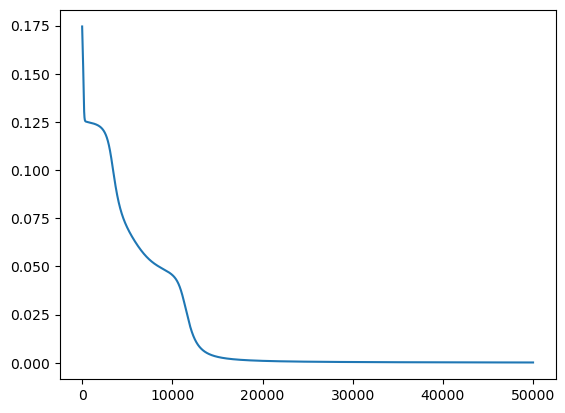

In [28]:
plt.plot(cost[2:])

In [29]:
y

array([[0.97421928, 0.026861  ],
       [0.98328056, 0.01574017],
       [0.02720806, 0.97232803],
       [0.01374366, 0.98649127],
       [0.98992064, 0.00974244],
       [0.01075396, 0.98928964]])